In [51]:

import numpy as np
import pandas as pd
#import pyfpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot

In [57]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [3]:
schedule=pd.read_excel("Master_Scheduled_Days_Off.xlsx")
accident=pd.read_excel("Master_Accident_Data.xlsx")
absence=pd.read_excel("Master_Absence_Data.xlsx")
absence=absence.drop(absence.columns[6:10],axis=1)


In [4]:
print(accident.head())

              accdate  Operator_ID  \
0 2017-03-15 18:20:00          365   
1 2016-05-18 08:27:00          173   
2 2018-09-12 14:09:00          329   
3 2019-05-07 15:00:00          276   
4 2015-05-12 07:15:00           42   

                              AccTypeCodeDescr  \
0               Vehicle Approaching From Angle   
1                              Vehicle Passing   
2         Collisions with other motor vehicles   
3               Vehicle Approaching From Angle   
4  Passenger On Board Thrown By RGRTA Movement   

                                 AccSubTypeCodeDescr  \
0  Vehicle approaches from right-both straight ac...   
1     Vehicle cuts in and scrapes RGRTA on left side   
2                                      Miscellaneous   
3  Vehicle approaches from left-vehicle turns-RGR...   
4  Other part of equipment-passenger standing or ...   

                         acctype BAITFISH Code FileNumber   AccPreventable  \
0          03 - MVA with Vehicle             0     17-2

In [75]:
preventable_accident_boolean = accident['AccPreventable'] == "Preventable"
preventable_accident = accident[preventable_accident_boolean]
nonpreventable_accident_boolean = accident['AccPreventable'] == "Non-Preventable"
nonpreventable_accident = accident[nonpreventable_accident_boolean]

In [6]:
print(preventable_accident.head())

               accdate  Operator_ID                      AccTypeCodeDescr  \
6  2017-06-20 08:00:00           62               Vehicle Operating Ahead   
7  2015-07-15 17:38:00          241  Collisions with other motor vehicles   
8  2016-09-27 15:25:00          345  Collisions with other motor vehicles   
9  2017-03-01 10:04:00          361            Collisions w/Fixed Objects   
10 2016-02-24 09:58:00           55            Collisions w/Other Objects   

                                  AccSubTypeCodeDescr  \
6   Vehicle slows or stops for traffic (railroad c...   
7                                       Miscellaneous   
8                                       Miscellaneous   
9                                       Miscellaneous   
10             Fixed object (lamp posts, poles, etc.)   

                       acctype BAITFISH Code FileNumber AccPreventable  \
6       02 - MVA with Injuries     Front End     17-776    Preventable   
7        03 - MVA with Vehicle       Turning  

In [76]:
preventable_accident['acctype']=preventable_accident['acctype'].astype('category')
print(type(preventable_accident['acctype']))
nonpreventable_accident['acctype']=nonpreventable_accident['acctype'].astype('category')

<class 'pandas.core.series.Series'>


/home/twt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/twt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
print(preventable_accident['acctype'].value_counts())

03 - MVA with Vehicle                       343
04 - MVA with Fixed Object                  239
06 - On Board Injury/Incident                12
10 - Other                                   10
02 - MVA with Injuries                        9
01 - Pedestrian Struck MVA                    9
05 - Boarding or Alighting Injury/Incide      2
6                                             1
Name: acctype, dtype: int64


In [93]:
pieces=[]

cate_columns=['AccTypeCodeDescr', 'AccSubTypeCodeDescr',
       'acctype', 'BAITFISH Code',
       'Retraining', 'vehbusno', 'vehmake', 'vehyear',
       'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
        'Addr_Type', 'Neighborhood']

'''
cate_columns=['AccTypeCodeDescr', 'AccSubTypeCodeDescr',
       'acctype', 'BAITFISH Code',
       'Retraining', 'vehmake', 'vehyear',
       'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
        'Addr_Type', 'Neighborhood']
'''
for col in cate_columns:
    tmp_series = preventable_accident[col].value_counts(normalize=True)
    print(tmp_series)
    tmp_series.name = col
    pieces.append(tmp_series)
df_value_counts = pd.concat(pieces,axis=1,sort=True).reindex() 

pieces=[]
for col in cate_columns:
    tmp_series = nonpreventable_accident[col].value_counts(normalize=True)
    print(tmp_series)
    tmp_series.name = col
    pieces.append(tmp_series)
df_non_value_counts = pd.concat(pieces,axis=1,sort=True).reindex() 

Collisions w/Fixed Objects                     0.272441
Collisions w/RGRTA vehicles (Bus to Bus)       0.225197
Collisions with other motor vehicles           0.141732
Collisions w/Other Objects                     0.107087
RGRTA Passing Stationary Vehicle               0.072441
Vehicle Approaching From Angle                 0.042520
Vehicle Operating Ahead                        0.034646
Vehicle Passing                                0.020472
RGRTA Passing Moving Vehicle                   0.017323
Pedestrian collision                           0.015748
Non-Collision Incidents                        0.011024
Thrown by movement of RGRTA stopping           0.007874
Miscellaneous Other                            0.006299
Passenger On Board Thrown By RGRTA Movement    0.006299
Overhang Collisions                            0.004724
Equipment damage or failure                    0.004724
Vehicle Following                              0.003150
Passenger Injured on board                     0

In [94]:
df_value_counts.to_excel("output_given_preventable.xlsx")
df_non_value_counts.to_excel("output_given_nonpreventable.xlsx")

1305.0    0.012598
1417.0    0.012598
528.0     0.012598
1411.0    0.011024
1304.0    0.011024
Name: vehbusno, dtype: float64

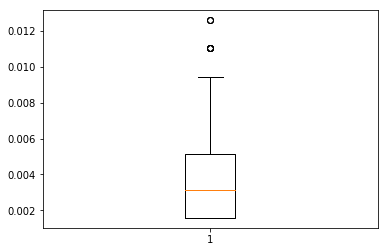

In [109]:
target='vehbusno'
target_factor=df_value_counts[target].dropna()
target_factor2=df_non_value_counts[target].dropna()
matplotlib.pyplot.boxplot(target_factor)
target_factor.sort_values(ascending=False).head(5)

1332.0    0.013294
1321.0    0.011817
763.0     0.011817
541.0     0.010340
528.0     0.010340
Name: vehbusno, dtype: float64

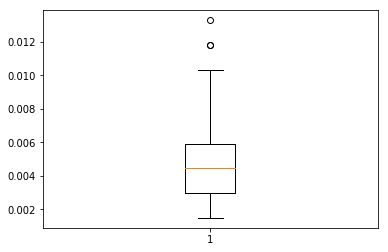

In [110]:
matplotlib.pyplot.boxplot(target_factor2)
target_factor2.sort_values(ascending=False).head(5)

Clear            0.627949
Cloudy           0.166969
Snow             0.090744
Rain             0.067151
Other            0.036298
Freezing Rain    0.007260
Sleet, Hail      0.001815
Fog              0.001815
Name: RoadwayWeather, dtype: float64

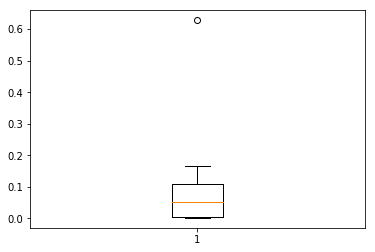

In [111]:
target='RoadwayWeather'
target_factor=df_value_counts[target].dropna()
target_factor2=df_non_value_counts[target].dropna()
matplotlib.pyplot.boxplot(target_factor)
target_factor.sort_values(ascending=False).head(10)

Clear            0.583468
Cloudy           0.217180
Snow             0.095624
Rain             0.090762
Other            0.006483
Sleet, Hail      0.003241
Freezing Rain    0.003241
Name: RoadwayWeather, dtype: float64

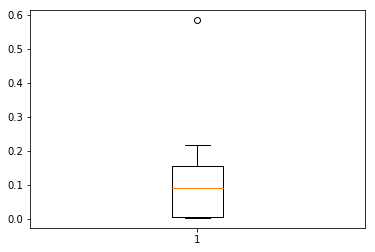

In [112]:
matplotlib.pyplot.boxplot(target_factor2)
target_factor2.sort_values(ascending=False).head(10)

0                            0.341195
Central Business District    0.221698
Beechwood                    0.176101
Group 14621                  0.031447
Maplewood                    0.018868
Name: Neighborhood, dtype: float64

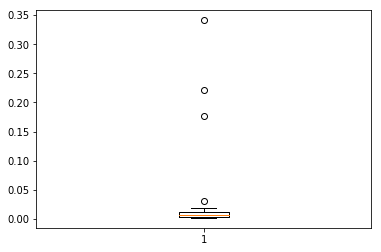

In [114]:
target='Neighborhood'
target_factor=df_value_counts[target].dropna()
target_factor2=df_non_value_counts[target].dropna()
matplotlib.pyplot.boxplot(target_factor)
target_factor.sort_values(ascending=False).head(5)

0                            0.389381
Central Business District    0.103245
Group 14621                  0.058997
Maplewood                    0.047198
19th Ward                    0.038348
Name: Neighborhood, dtype: float64

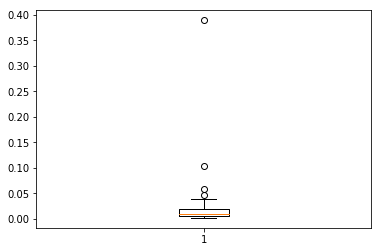

In [115]:
matplotlib.pyplot.boxplot(target_factor2)
target_factor2.sort_values(ascending=False).head(5)

Collisions w/Fixed Objects                  0.272441
Collisions w/RGRTA vehicles (Bus to Bus)    0.225197
Collisions with other motor vehicles        0.141732
Collisions w/Other Objects                  0.107087
RGRTA Passing Stationary Vehicle            0.072441
Name: AccTypeCodeDescr, dtype: float64

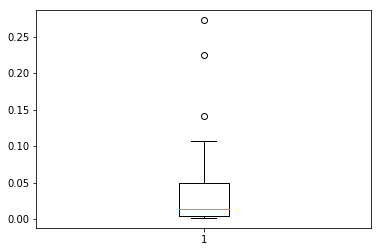

In [116]:
target='AccTypeCodeDescr'
target_factor=df_value_counts[target].dropna()
target_factor2=df_non_value_counts[target].dropna()
matplotlib.pyplot.boxplot(target_factor)
target_factor.sort_values(ascending=False).head(5)

Collisions with other motor vehicles        0.347633
Vehicle Passing                             0.220414
Vehicle Following                           0.121302
Vehicle Approaching From Angle              0.100592
Collisions w/RGRTA vehicles (Bus to Bus)    0.047337
Name: AccTypeCodeDescr, dtype: float64

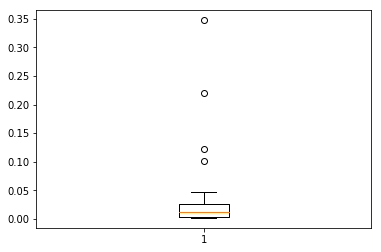

In [117]:
matplotlib.pyplot.boxplot(target_factor2)
target_factor2.sort_values(ascending=False).head(5)

Collisions w/Fixed Objects                  0.272441
Collisions w/RGRTA vehicles (Bus to Bus)    0.225197
Collisions with other motor vehicles        0.141732
Collisions w/Other Objects                  0.107087
RGRTA Passing Stationary Vehicle            0.072441
Name: AccTypeCodeDescr, dtype: float64

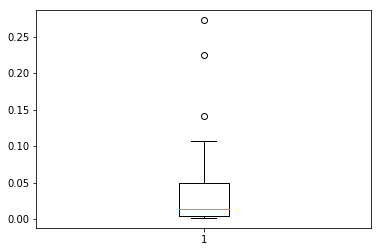

In [118]:
target='AccTypeCodeDescr'
target_factor=df_value_counts[target].dropna()
target_factor2=df_non_value_counts[target].dropna()
matplotlib.pyplot.boxplot(target_factor)
target_factor.sort_values(ascending=False).head(5)

In [ ]:
matplotlib.pyplot.boxplot(target_factor2)
target_factor2.sort_values(ascending=False).head(5)